数字信号分析与处理
---

>1、基本波形

>>三角波

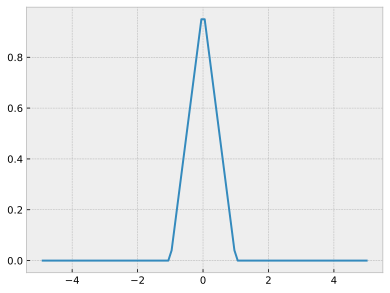

In [19]:
import numpy as np
from scipy import signal,convolve
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format='svg'#设置图片格式
t=np.linspace(-5,5,100)
T=1;
A=1;
f1=open('D:\code\Python Code/data/temp/1.csv','w+')
for t in t:
    if np.abs(t)<T:
        x=A*((1-np.abs(t))/T)
    elif np.abs(t)>T:
        x=0
    print(t,x,file=f1,sep=',')
f1.close()
data_1=pd.read_csv('D:\code\Python Code/data/temp/1.csv')
data_1.columns=['x','y']
#print(data_1,data_1.shape)
# print(data_1)
x=data_1['x'];y=data_1['y']
plt.plot(x,y)
plt.show()

>>雷克子波

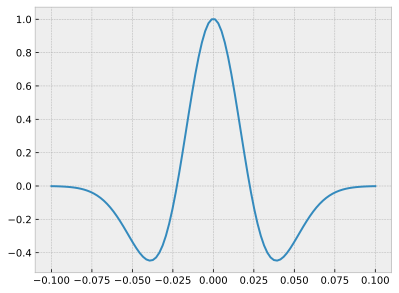

In [20]:

def Ricker_Wavelet(t):
    f_m1=10;
    return (1-2*np.pi**2*f_m1**2*t**2)*np.exp(-np.pi**2*f_m1**2*t**2);

t=np.linspace(-0.1,0.1,100)#时间序列，雷克子波激发时间很短，t的值需要变小。

result=Ricker_Wavelet(t)#返回雷克子波的数值
#print(Ricker_Wavelet(t))
rick_1=result/abs(result).max()#进行归一化处理。

plt.plot(t,rick_1)
plt.show()


>>单位阶跃信号

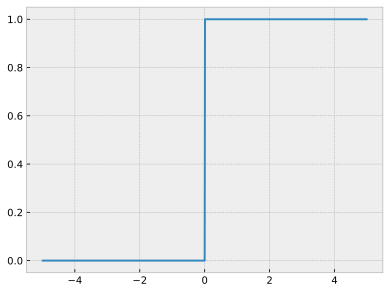

In [21]:
t=np.arange(-5,5,0.01)
def u(t):
    if t>0:
        u=1
    elif t<0:
        u=0
    return u
with open('D:/code/Python Code/data/temp/u_x.csv','w+') as f2:#开文件
    for t in t:
        print(t,u(t),file=f2,sep=',')#循环中写入数据。
data_ut=pd.read_csv('D:/code/Python Code/data/temp/u_x.csv')
data_ut.columns=['t','u_t']
t=data_ut['t'];u_t=data_ut['u_t']
plt.plot(t,u_t)
plt.show()

>>单位符号函数

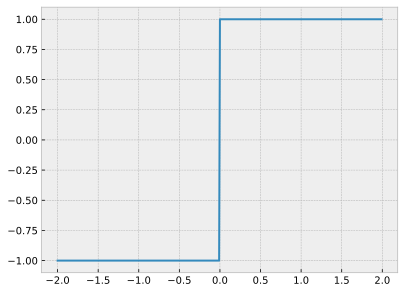

In [22]:
t=np.arange(-2,2,0.01)
sgnt=np.sign(t)
plt.plot(t,sgnt)
plt.show()

>>傅里叶核函数

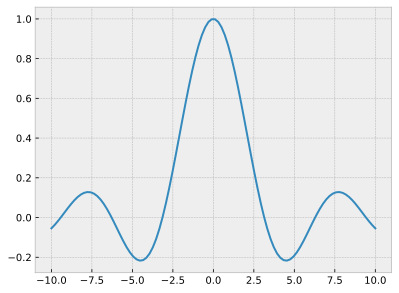

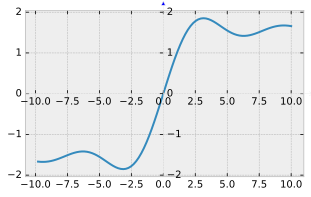

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd

t=np.linspace(-10,10,100)
x=np.sin(t)/t#核函数
plt.plot(t,x)
plt.show()

def x(t):
    return np.sin(t)/t

with open('D:/code/Python Code/data/temp/jifen.csv','w+') as f3:
    for t in t :#遍历计算积分
        result=integrate.quad(lambda t:x(t),0,t)#使用lambda ：x,f(x),积分下限，积分上限
        print(t,result[0],file=f3,sep=',')#第一项是积分结果，第二个是误差result[0]

data_2=pd.read_csv('D:/code/Python Code/data/temp/jifen.csv')
data_2.columns=['t','result']
t=data_2['t']
result=data_2['result']

import mpl_toolkits.axisartist as axisartist
fig = plt.figure(figsize=(5,3))  # 创建画布
#使用axisartist.Subplot方法创建一个绘图区对象ax
ax = axisartist.Subplot(fig, 111)  # 111 代表1行1列的第1个，subplot()可以用于绘制多个子图
fig.add_axes(ax)  # 将绘图区对象添加到画布中

# ----------2. 绘制带箭头的x-y坐标轴#通过set_visible方法设置绘图区所有坐标轴隐藏-------
ax.axis[:].set_visible(True)  # 隐藏了四周的方框
#ax.new_floating_axis代表添加新的坐标轴
ax.axis["x"] = ax.new_floating_axis(0,0)
ax.axis["x"].set_axisline_style("->", size = 1.0)  # 给x坐标轴加上箭头
ax.axis["y"] = ax.new_floating_axis(1,0)  # 添加y坐标轴，且加上箭头
ax.axis["y"].set_axisline_style("-|>", size = 1.0)
#设置x、y轴上刻度显示方向
ax.axis["x"].set_axis_direction("bottom")
ax.axis["y"].set_axis_direction("right")

plt.plot(t,result)

plt.show()#正弦积分。

>>傅里叶核函数进行快速傅里叶变换fft

d:\Program Files\PYTHON PROGRAM\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'list')

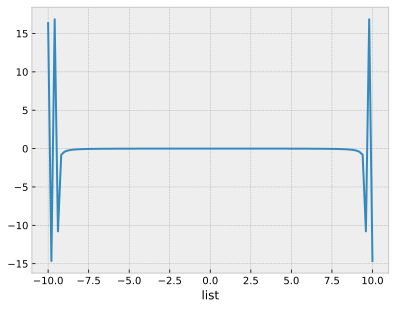

In [24]:
from scipy.fft import fft,ifft
t=np.linspace(-10,10,100)
x=np.sin(t)/t#核函数
x_fft=fft(x)#返回复数
# print(x_fft)
x_ifft=ifft(x_fft)
plt.plot(t,x_fft)
plt.style.use('bmh')
plt.xlabel('list')

test

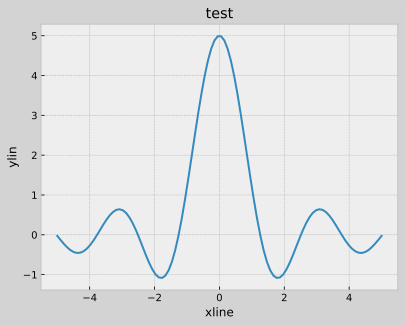

In [25]:
import numpy as np
import matplotlib.pyplot as plt
omg=np.linspace(-5,5,100)
plt.style.use('bmh')
tao=5
def y(t):
    return (2/omg)*np.sin((omg*tao)/2)
fig,ax=plt.subplots(facecolor='lightgrey')
ax.plot(omg,y(omg))
ax.set_xlabel('xline')
ax.set_ylabel('ylin')
ax.set_title('test')
plt.show()

>噪音信号插值

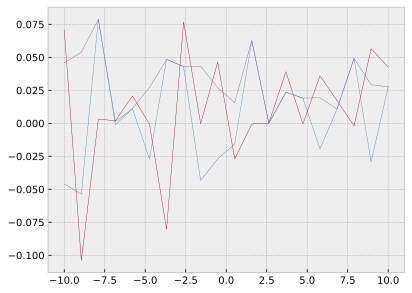

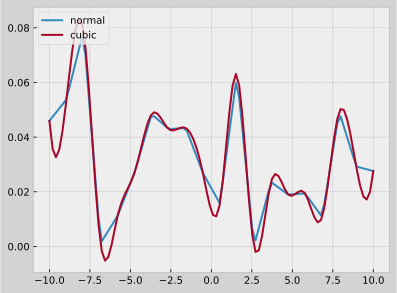

In [26]:
import numpy as np
import matplotlib.pyplot as plt 

st=20
noise=np.random.normal(0,0.05,st)
%config InlineBackend.figure_format='svg'

t=np.linspace(-10,10,st)
y=np.sin(t)*noise
y2=np.cos(t)*noise
y3=np.abs(np.sin(t))*(np.abs(noise))

fig,ax=plt.subplots()
ax.plot(t,y,linewidth=0.4,label='y=np.sin(t)*noise')
ax.plot(t,y2,linewidth=0.4,label='y2=np.cos(t)*noise')
ax.plot(t,y3,linewidth=0.4,label='y3=np.abs(np.sin(t))*(np.abs(noise))')

from scipy import interpolate
from scipy.interpolate import interp1d
s=interpolate.InterpolatedUnivariateSpline(t,y)

fig,ax=plt.subplots(facecolor='lightgrey')#重新指定即可获得下一图

f=interp1d(t,y3)#线性插值
f2=interp1d(t,y3,kind='cubic')#三次插值
tnew=np.linspace(-10,10,100)

ax.plot(tnew,f(tnew),label='normal')
ax.plot(tnew,f2(tnew),label='cubic')
plt.legend(loc='upper left')
plt.show()

高斯一阶导函数子波

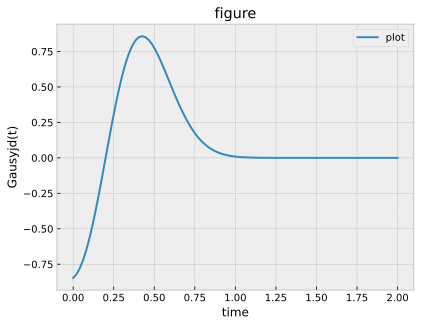

In [27]:
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt 
def Gausyjd(t):
    fm=1#主频
    t0=0.2;#延迟时间
    return 2*np.pi*fm*(t-t0)*np.exp(-(np.pi*fm*(t-t0))**2)
t=np.linspace(0,2,100)
#print(t,Gausyjd(t))
fig,ax=plt.subplots()
ax.plot(t,Gausyjd(t),label='plot')
ax.set_xlabel('time')
ax.set_ylabel('Gausyjd(t)')
ax.set_title('figure')
ax.legend()
plt.show()

分段函数开文件存储，pandas读文件，

           t  y
0  -4.898990 -1
1  -4.797980 -1
2  -4.696970 -1
3  -4.595960 -1
4  -4.494949 -1
..       ... ..
94  4.595960  1
95  4.696970  1
96  4.797980  1
97  4.898990  1
98  5.000000  1

[99 rows x 2 columns]


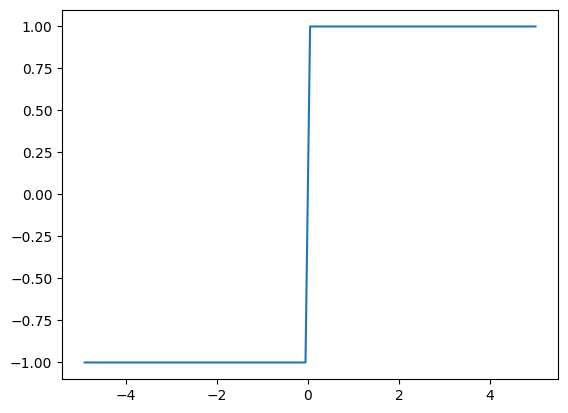

In [31]:
def sgn(t):
    if t<0:
        return -1
    elif t==0:
        return 0
    else:
        return 1
import numpy as np
import pandas as pd
x=np.linspace(-5,5,100)
fsgn=open('D:\code\Python Code/data/sgn.txt','w+')
for t in x:
    y=sgn(t)
    # print(t,y)
    print(t,y,file=fsgn,sep=',')
data=pd.read_csv('D:/code/Python Code/data/sgn.txt')
#print(data[:])
data.columns=['t','y']#指定列标签
print(data)
plt.plot(data['t'],data['y'])


计算信号的频谱，离散信号/长度/采样率

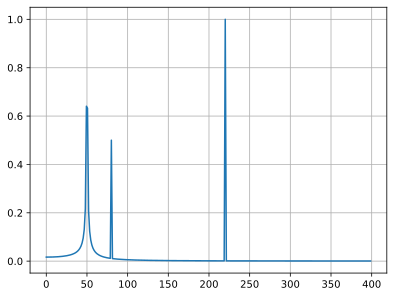

In [193]:
from scipy.fft import fft,ifft
import  matplotlib.pyplot as plt
from scipy.fftpack import fftfreq

x=np.array([1.0,2.0,1.0,-1.0,1.5])
y=fft(x)#傅里叶变换

N=600#信号长度len(t)
T=1.0/800#采样率
x=np.linspace(0.0,N*T,N,endpoint=False)#0-t，t=N*T
y=np.sin(50.0*2.0*np.pi*x)+0.5*np.sin(80.0*2.0*np.pi*x)+np.sin(220*2.0*np.pi*x)#频谱
yf=fft(y)
xf=fftfreq(N,T)[:N//2]#傅里叶频谱（信号长度，1/采样率）
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.grid()
plt.show()